In [22]:
import os
os.chdir('D://scratch_backup//alpine//beri9208//mnc-pt-pyrid//calcs//surfs//')
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import funcs
from matplotlib.colors import Normalize
save_dir = 'C://Users//User//PycharmProjects//Musgrave_scripts//BenRich//integrated_charge_density_nobias//'
surf_dirs = [
    ["4N//No_bias//", "3N//No_bias//", "2n-cis//No_bias//", "2n-trans//No_bias//", "1n//No_bias//", "0n//No_bias//"],
    ["4NPt1H//No_bias//", "3NPt1H//No_bias//", "2n-cisPt1H//No_bias//", "2n-transPt1H//No_bias//", "1nPt1H//No_bias//", "0nPt1H//No_bias//"]
]
# surf_names = [
#     ['4N, No_bias', '3N, No_bias', '2N-cis, No_bias', '2N-trans, No_bias', '1N, No_bias', '0n, No_bias'],
#     ['4NPt1H, No_bias', '3NPt1H, No_bias', '2N-cisPt1H, No_bias', '2N-transPt1H, No_bias', '1NPt1H, No_bias', '0nPt1H, No_bias']
# ]
surf_names = [
    ['4N', '3N', '2N-cis', '2N-trans', '1N', '0n'],
    ['4N (Pt1H)', '3N (Pt1H)', '2N-cis (Pt1H)', '2N-trans (Pt1H)', '1N (Pt1H)', '0n (Pt1H)']
]
mplots = len(surf_dirs)
nplots = 0
for d1 in surf_dirs:
    nplots = max(len(d1), nplots)
plane_idcs = []
for i, d1 in enumerate(surf_dirs):
    plane_idcs.append([])
    for j, d2 in enumerate(d1):
        plane_idcs[-1].append(funcs.get_plane_idx(d2 + 'out', 'Pt'))

In [23]:
import funcs
Rs = []
Ss = []
mus = []
for d1 in surf_dirs:
    Rs.append([])
    Ss.append([])
    mus.append([])
    for d2 in d1:
        R, S, mu = funcs.get_output_shape(d2 + 'out')
        Rs[-1].append(R)
        Ss[-1].append(S)
        mus[-1].append(mu)
d_tots = []
for i, d1 in enumerate(surf_dirs):
    d_tots.append([])
    for j, d2 in enumerate(d1):
        d_tot = np.fromfile(d2 + 'd_tot')
        d_tot = np.reshape(d_tot, Ss[i][j])
        d_tots[-1].append(d_tot)
a_tuples = []
da_tuples = []
for i, d1 in enumerate(surf_dirs):
    a_tuples.append([])
    da_tuples.append([])
    for j, d2 in enumerate(d1):
        a_tuple, da_tuple = funcs.init_box_xyz_coords(Rs[i][j], Ss[i][j])
        a_tuples[-1].append(a_tuple)
        da_tuples[-1].append(da_tuple)
plot_slices = []
for i, d1 in enumerate(surf_dirs):
    plot_slices.append([])
    for j, d2 in enumerate(d1):
        plot_slices[-1].append(np.zeros(np.shape(d_tots[i][j][:,:,0])))
intg_z_bounds_list = []
for i, d1 in enumerate(surf_dirs):
    intg_z_bounds_list.append([])
    for j, d2 in enumerate(d1):
        intg_z_bounds_list[-1].append((plane_idcs[i][j], plane_idcs[i][j] + int(Ss[i][j][2]/8)))
for i, d1 in enumerate(surf_dirs):
    for j, d2 in enumerate(d1):
        for k in range(intg_z_bounds_list[i][j][0], intg_z_bounds_list[i][j][1]):
            plot_slices[i][j] += d_tots[i][j][:,:,k]
        plot_slices[i][j] *= da_tuples[i][j][2]

In [24]:
# Generate sample data (replace this with your 2D array and associated x/y values)
num_points = 100
xyzs = []
for i, p1 in enumerate(plot_slices):
    xyzs.append([])
    for j, p2 in enumerate(p1):
        xyzs[-1].append(funcs.conv_to_cartesian(p2, Rs[i][j], Ss[i][j]))

grid_xys = []
for i, p1 in enumerate(plot_slices):
    grid_xys.append([])
    for j, p2 in enumerate(p1):
        x = xyzs[i][j][0]
        y = xyzs[i][j][1]
        grid_xys[-1].append(np.mgrid[min(x):max(x):200j, min(y):max(y):200j])

grid_zs = []
for i, xy1 in enumerate(grid_xys):
    grid_zs.append([])
    for j, xy2 in enumerate(xy1):
        x = xyzs[i][j][0]
        y = xyzs[i][j][1]
        z = xyzs[i][j][2]
        grid_x = grid_xys[i][j][0]
        grid_y = grid_xys[i][j][1]
        grid_zs[-1].append(griddata((x, y), z, (grid_x, grid_y), method='cubic'))

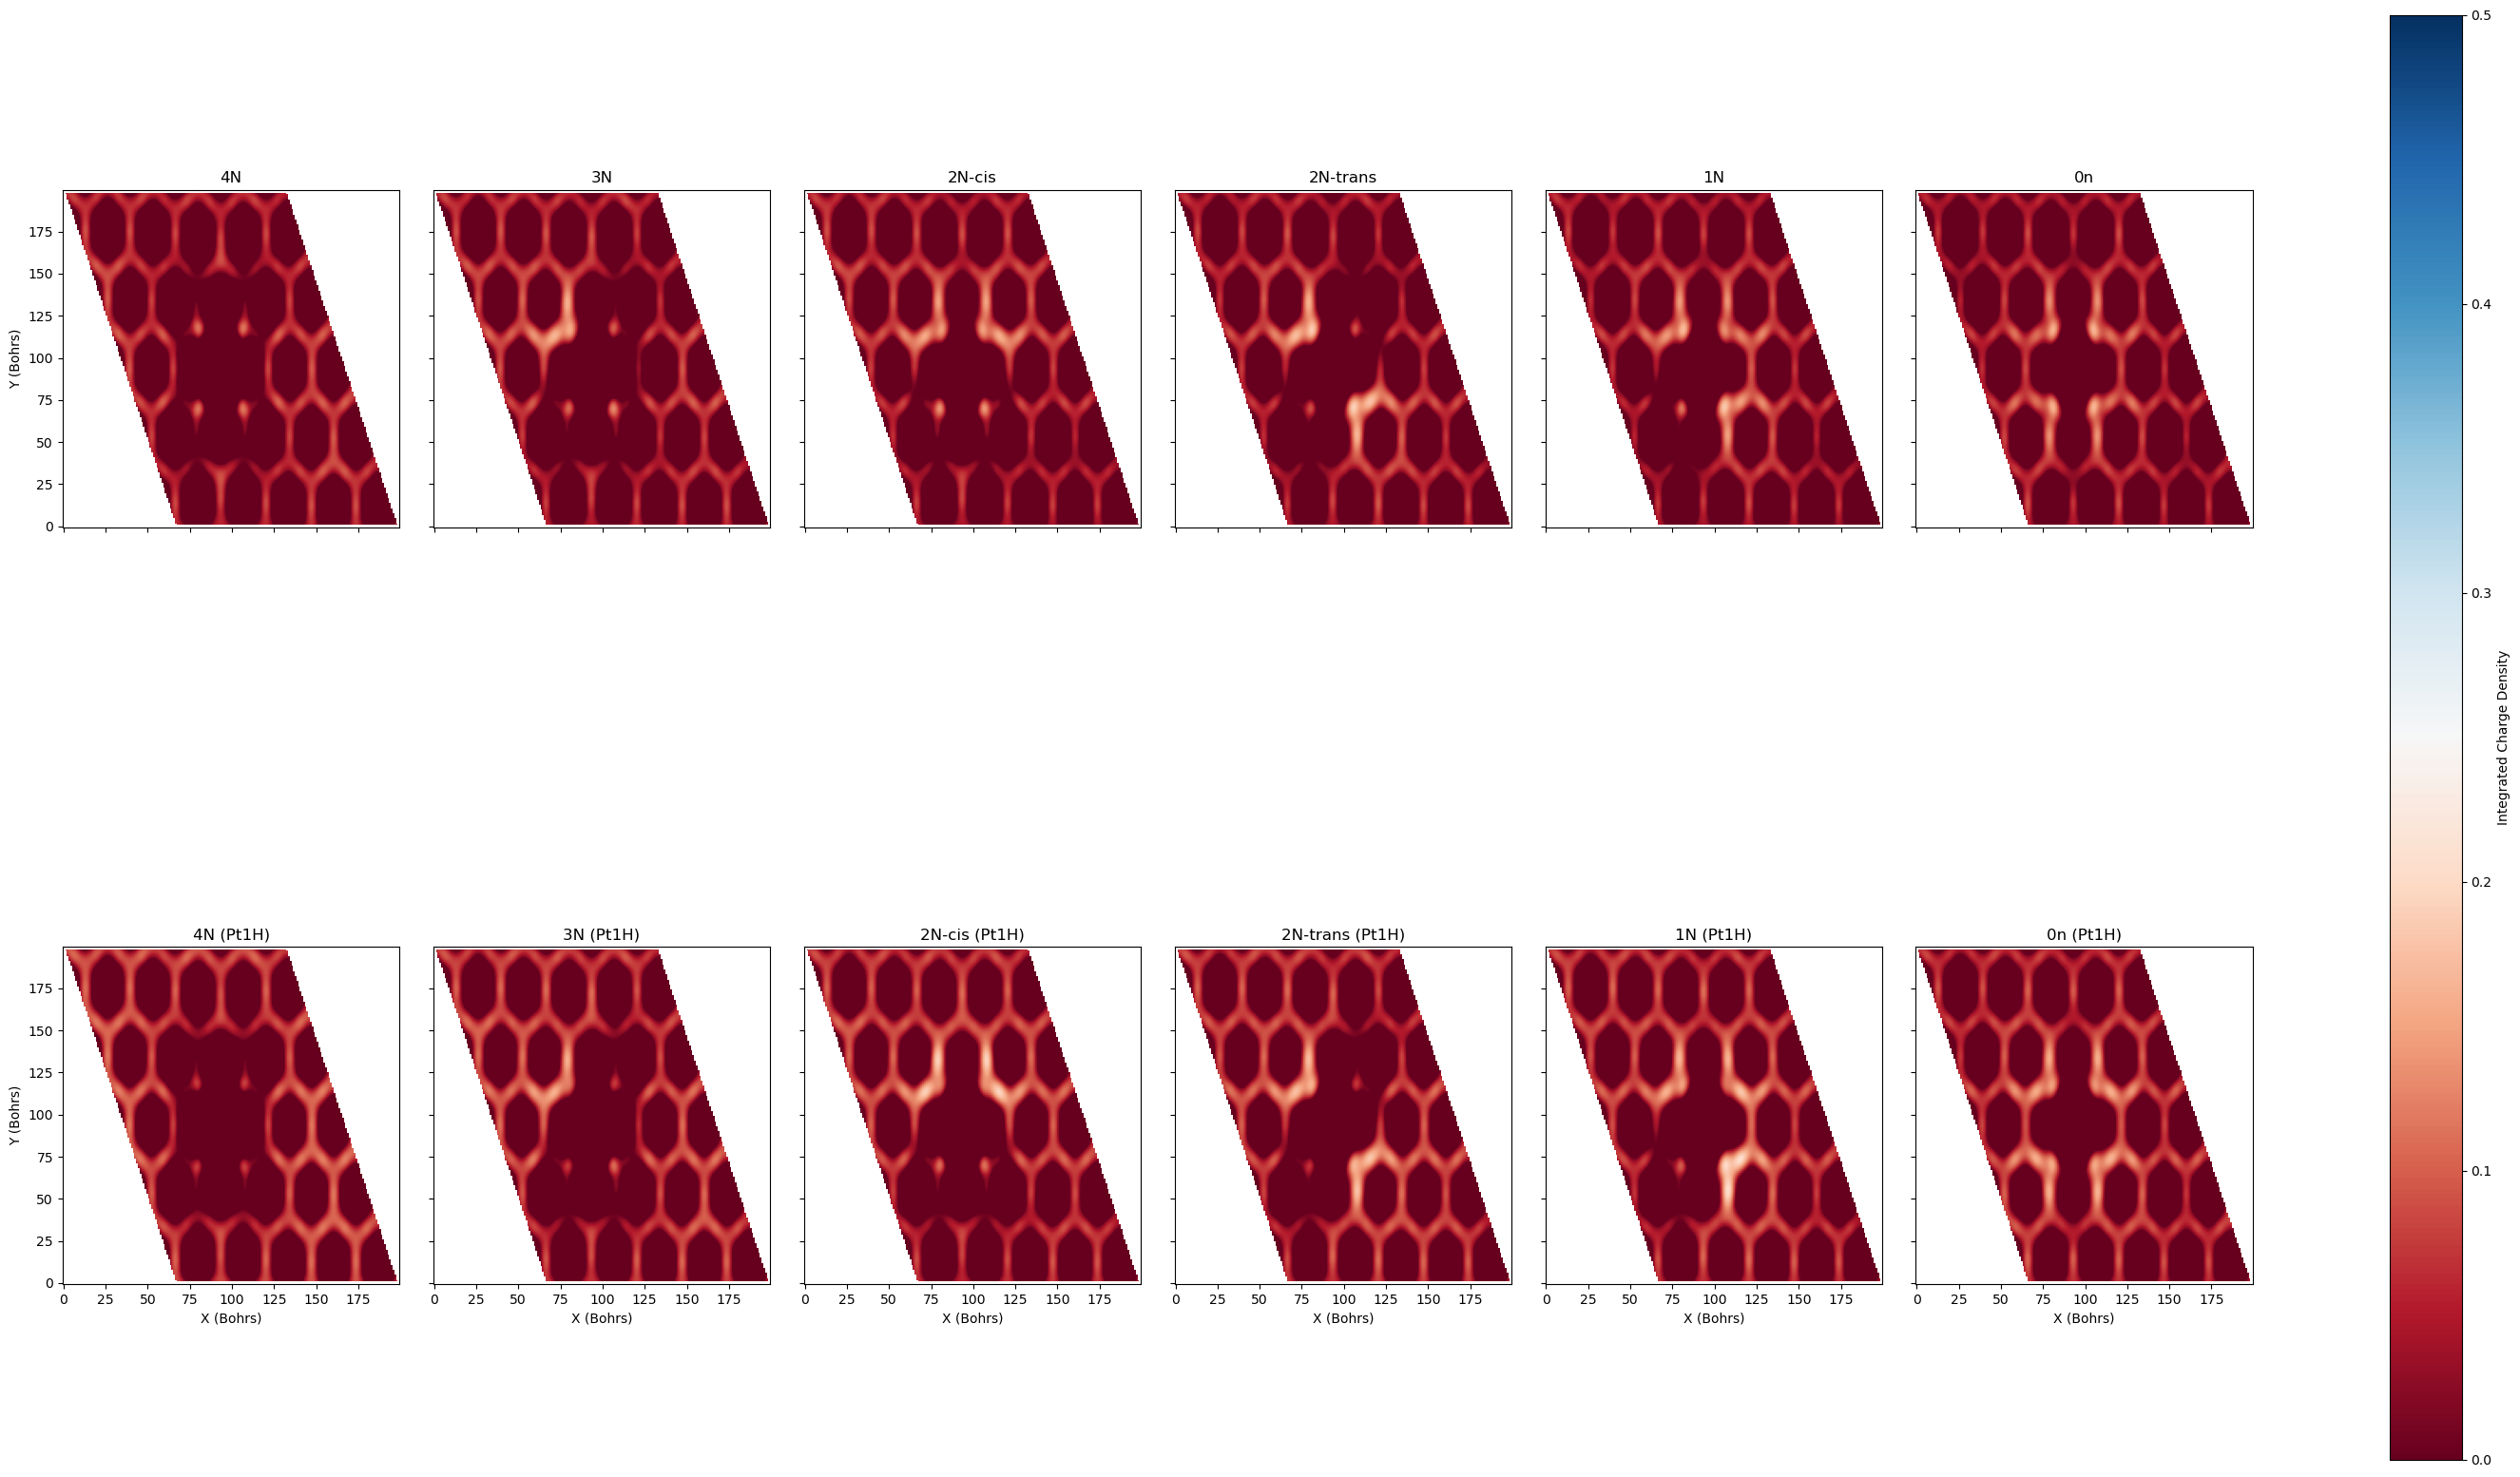

In [26]:
fig, axes = plt.subplots(mplots, nplots, figsize=(6*nplots, 1 + 3*nplots), sharex=True, sharey=True)
custom_norm = Normalize(vmin=0.0, vmax=0.5)
for i in range(mplots):
    for j in range(len(surf_dirs[i])):
        ax = axes[i][j]
        c = ax.imshow(grid_zs[i][j].T, origin='lower', cmap='RdBu', norm=custom_norm)
        # c = ax.imshow(grid_zs[i][j].T, origin='lower', cmap='viridis')
        ax.set_title(surf_names[i][j])
for j in range(len(surf_dirs[0])):
    axes[-1][j].set_xlabel('X (Bohrs)')
for ax1 in axes:
    ax1[0].set_ylabel('Y (Bohrs)')
# for i, ax1 in enumerate(axes):
#     for j, ax2 in enumerate(ax1):
#         c = ax2.imshow(grid_zs[i][j].T, origin='lower', cmap='viridis')
#         ax2.set_title(surf_names[i][j])
# for ax2 in axes[-1]:
#     ax2.set_xlabel('X (Bohrs)')
# for ax1 in axes:
#     ax1[0].set_ylabel('Y (Bohrs)')
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.1, hspace=0.1)
fig.colorbar(c, ax=axes.ravel().tolist(), label='Integrated Charge Density')
plt.savefig(save_dir + 'multiple_mbyn_nb.png')
plt.show()